In [1]:
import neuralnetwork
from neuralnetwork import FFNN 
from neuralnetwork import Sigmoid
from neuralnetwork import RELU
from neuralnetwork import LRELU
from neuralnetwork import MSE
from neuralnetwork import Softmax
from neuralnetwork import MCE_multiclass
from neuralnetwork import Adam
from neuralnetwork import Activations
from neuralnetwork import Constant
from neuralnetwork import RMS_prop
import math
import autograd.numpy as np
import sys
import warnings
from autograd import grad, elementwise_grad
from random import random, seed
from copy import deepcopy, copy
from typing import Tuple, Callable
from sklearn.utils import resample

In [25]:
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')

# Extract data (features) and target (labels)
X = mnist.data.astype(np.float32)
y = mnist.target.astype('int')
X = X / 255.0
#The Pixel values in MNIST range from 0 to 255. Scaling them to a 0-1 range can improve the performance of some models
X.shape

(70000, 784)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False)
y_train_onehot = enc.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = enc.transform(y_test.reshape(-1, 1)) 

In [4]:
def Call_FFNN(nodes, hidden_activation, eta, batches, epochs, lam, output_activation, cost_func):
    if __name__ == '__main__':
        
        b_2h_50_100n_ADAMupdated = FFNN(
            nodes,
            hidden_activation = hidden_activation,
            output_activation = output_activation, 
            cost_func = cost_func
        )

        results = b_2h_50_100n_ADAMupdated.fit(
            X = X_train, 
            t = y_train_onehot,
            scheduler = Adam(eta, rho=0.9, rho2=0.99),
            batches = batches,
            epochs = epochs,
            lam = lam
        )
    return results

In [5]:
nodes = (784,100,100,10)
eta = 0.0001
batches = 1
epoch_list = [500, 1000, 2500]
lam = 0.001
hidden_activation_list = [Sigmoid(), RELU(), LRELU()]
train_accuracy = np.zeros((3,3))
train_error = np.zeros((3,3))

for i, hidden_activation in enumerate(hidden_activation_list):
    for j, epochs in enumerate(epoch_list):
        scores = Call_FFNN(nodes,hidden_activation,eta,batches,epochs,lam, output_activation=Softmax(), cost_func=MCE_multiclass())
        train_accuracy[i,j] = scores['train_accs'][-1]
        train_error[i,j] = scores['train_errors'][-1]

Adam: Eta=0.0001, Lambda=0.001
  [=======================================>] 100.0% | train_error: 0.185 | train_acc: 0.462  Adam: Eta=0.0001, Lambda=0.001
  [=======================================>] 100.0% | train_error: 0.0827 | train_acc: 0.739 Adam: Eta=0.0001, Lambda=0.001
  [=======================================>] 100.0% | train_error: 0.0237 | train_acc: 0.928  Adam: Eta=0.0001, Lambda=0.001
  [=======================================>] 100.0% | train_error: 1.18 | train_acc: 0.413  Adam: Eta=0.0001, Lambda=0.001
  [=======================================>] 100.0% | train_error: 0.513 | train_acc: 0.737 Adam: Eta=0.0001, Lambda=0.001
  [=======================================>] 100.0% | train_error: 0.124 | train_acc: 0.926  Adam: Eta=0.0001, Lambda=0.001
  [=======================================>] 100.0% | train_error: 1.18 | train_acc: 0.413  Adam: Eta=0.0001, Lambda=0.001
  [=======================================>] 100.0% | train_error: 0.513 | train_acc: 0.737 Adam: Eta=0

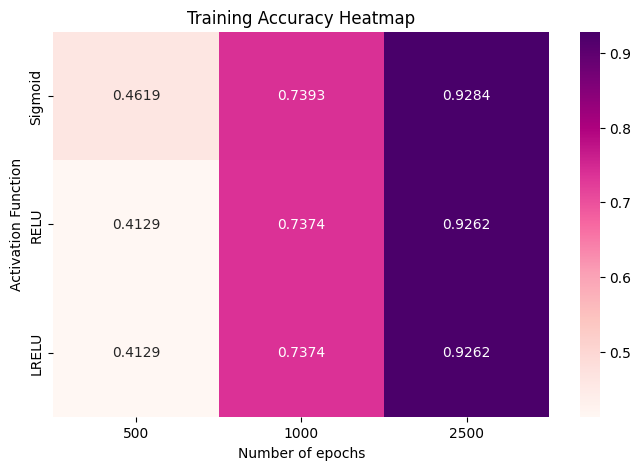

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
activation_labels = ['Sigmoid', 'RELU', 'LRELU']

plt.figure(figsize=(8, 5))
sns.heatmap(train_accuracy, annot=True, fmt='.4f', cmap='RdPu',
            xticklabels=epoch_list, yticklabels=activation_labels)

plt.title("Training Accuracy Heatmap")
plt.xlabel("Number of epochs")
plt.ylabel("Activation Function")
plt.show()

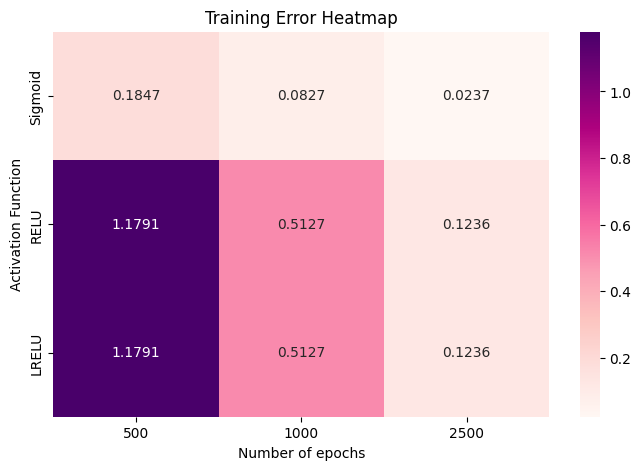

In [10]:
plt.figure(figsize=(8, 5))
sns.heatmap(train_error, annot=True, fmt='.4f', cmap='RdPu',
            xticklabels=epoch_list, yticklabels=activation_labels)

plt.title("Training Error Heatmap")
plt.xlabel("Number of epochs")
plt.ylabel("Activation Function")
plt.show()

In [11]:
nodes = (784,100,100,10)
eta_list = [0.1, 0.0065, 0.0001]
batches = 1
epochs = 2000
lam_list = [0.1, 0.01, 0.001]
hidden_activation = Sigmoid()
train_accuracy = np.zeros((4,3))
train_error = np.zeros((4,3))

for i, eta in enumerate(eta_list):
    for j, lam in enumerate(lam_list):
        scores = Call_FFNN(nodes,hidden_activation=Sigmoid(),eta=eta, batches=batches, epochs=epochs, lam=lam, output_activation=Softmax(), cost_func=MCE_multiclass())
        train_accuracy[i,j] = scores['train_accs'][-1]
        train_error[i,j] = scores['train_errors'][-1]

Adam: Eta=0.1, Lambda=0.1
  [=======================================>] 100.0% | train_error: 0.0377 | train_acc: 0.946  Adam: Eta=0.1, Lambda=0.01
  [=======================================>] 100.0% | train_error: 0.0755 | train_acc: 0.882  Adam: Eta=0.1, Lambda=0.001
  [=======================================>] 100.0% | train_error: 0.0552 | train_acc: 0.918  Adam: Eta=0.0065, Lambda=0.1
  [=======================================>] 100.0% | train_error: 0.00176 | train_acc: 0.997 Adam: Eta=0.0065, Lambda=0.01
  [=======================================>] 100.0% | train_error: 0.00158 | train_acc: 0.998 Adam: Eta=0.0065, Lambda=0.001
  [=======================================>] 100.0% | train_error: 0.00138 | train_acc: 0.998 Adam: Eta=0.0001, Lambda=0.1
  [=======================================>] 100.0% | train_error: 0.0332 | train_acc: 0.897  Adam: Eta=0.0001, Lambda=0.01
  [=======================================>] 100.0% | train_error: 0.0332 | train_acc: 0.898  Adam: Eta=0.0001, 

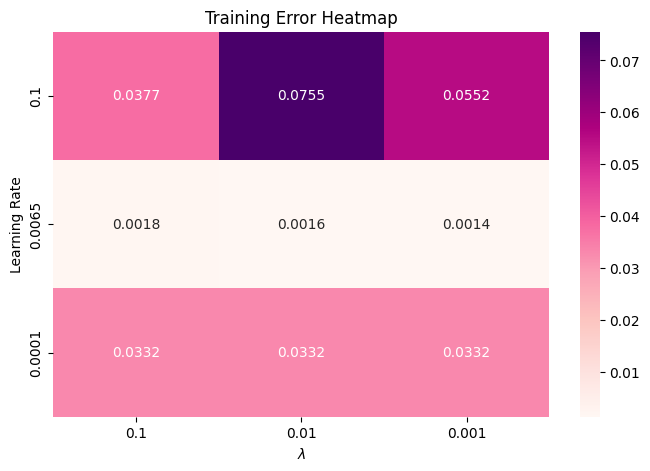

In [16]:
plt.figure(figsize=(8, 5))
sns.heatmap(train_error[:3,:], annot=True, fmt='.4f', cmap='RdPu',
            xticklabels=lam_list, yticklabels=eta_list)

plt.title("Training Error Heatmap")
plt.xlabel(r"$\lambda$")
plt.ylabel("Learning Rate")
plt.show()

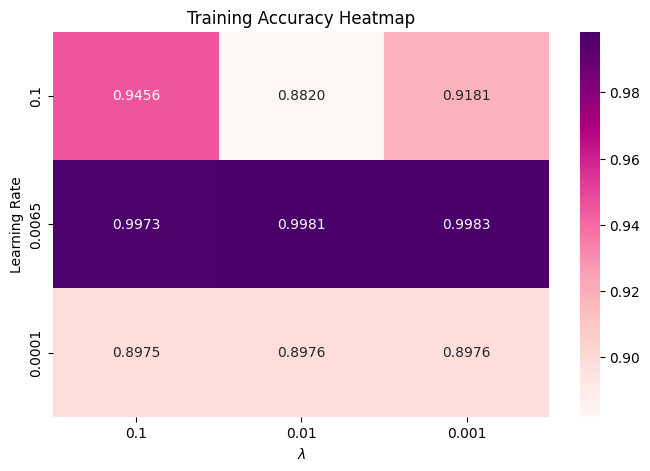

In [15]:
plt.figure(figsize=(8, 5))
sns.heatmap(train_accuracy[:3,:], annot=True, fmt='.4f', cmap='RdPu',
            xticklabels=lam_list, yticklabels=eta_list)

plt.title("Training Accuracy Heatmap")
plt.xlabel(r"$\lambda$")
plt.ylabel("Learning Rate")
plt.show()

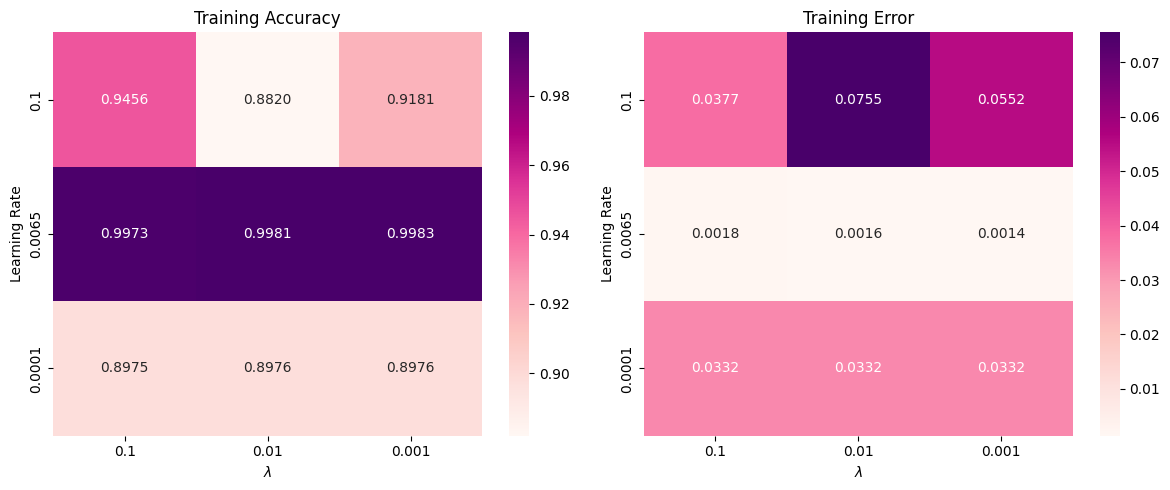

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(train_accuracy[:3,:], annot=True, fmt=".4f", cmap="RdPu",
            xticklabels=lam_list, yticklabels=eta_list, ax=axes[0])
axes[0].set_title("Training Accuracy")
axes[0].set_xlabel(r"$\lambda$")
axes[0].set_ylabel("Learning Rate")

sns.heatmap(train_error[:3,:], annot=True, fmt=".4f", cmap="RdPu",
            xticklabels=lam_list, yticklabels=eta_list, ax=axes[1])
axes[1].set_title("Training Error")
axes[1].set_xlabel(r"$\lambda$")
axes[1].set_ylabel("Learning Rate")

plt.tight_layout()
plt.show()

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

In [28]:
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')

# Extract data (features) and target (labels)
X = mnist.data.astype(np.float32)
y = mnist.target.astype('int')
X = X / 255.0
#The Pixel values in MNIST range from 0 to 255. Scaling them to a 0-1 range can improve the performance of some models
X.shape

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.metrics import log_loss
def Classifier_acc_err(hidden_layer_sizes, eta, lam, epochs):
    classifier = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes, 
        activation='logistic', 
        solver='adam',
        alpha=lam, 
        batch_size=len(X_train), 
        learning_rate_init=eta, 
        max_iter=epochs, 
        beta_2=0.99,
        random_state=2030       #Mulig MLPReg bruker sin egen 'random tall generator' så dette er kanskje poengløst
    )
    classifier.fit(X_train, y_train.ravel())     #ravel() flattens ytrain to a 1d array - shape: (n,)
    
    train_accuracy = classifier.score(X_train,y_train)
    proba = classifier.predict_proba(X_train)
    MLP_error = log_loss(y_train, proba)

    #test_accuracy = classifier.score(X_test, y_test)
    
    return train_accuracy, MLP_error

In [38]:


hidden_layer_sizes = (100,100)
epochs = 2000
eta_list = [0.1, 0.0065, 0.0001]
lam_list = [0.1, 0.01, 0.001]
classifier_accuracy = np.zeros((3,3))
classifier_error = np.zeros((3,3))

for i,eta in enumerate(eta_list):
    for j,lam in enumerate(lam_list):
        classifier_accuracy[i,j], classifier_error[i,j] = Classifier_acc_err(hidden_layer_sizes, eta, lam, epochs)


/Users/birkskogsrud/Desktop/prog_host25/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/birkskogsrud/Desktop/prog_host25/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/birkskogsrud/Desktop/prog_host25/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


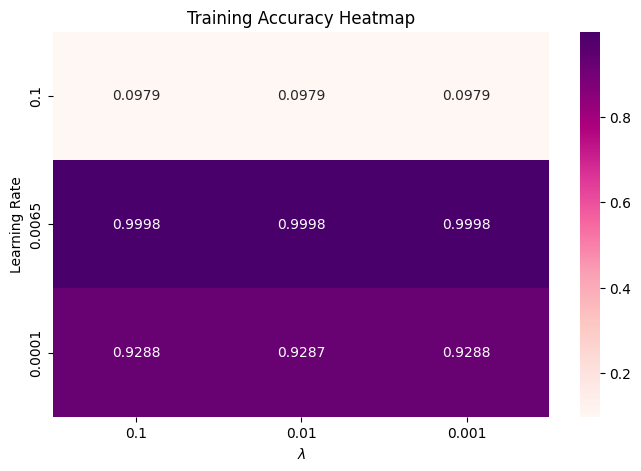

In [39]:
plt.figure(figsize=(8, 5))
sns.heatmap(classifier_accuracy, annot=True, fmt='.4f', cmap='RdPu',
            xticklabels=lam_list, yticklabels=eta_list)

plt.title("Training Accuracy Heatmap")
plt.xlabel(r"$\lambda$")
plt.ylabel("Learning Rate")
plt.show()

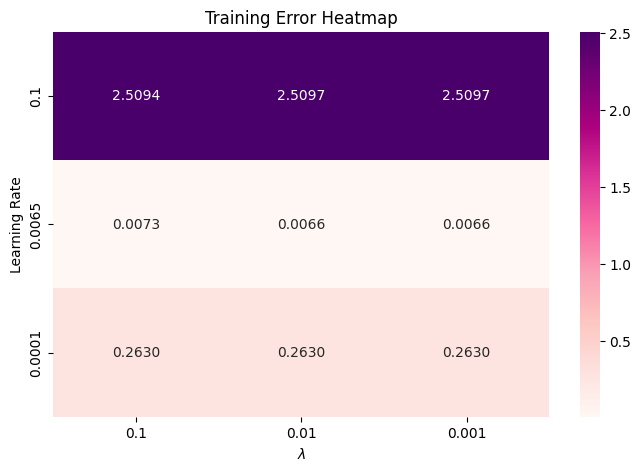

In [40]:
plt.figure(figsize=(8, 5))
sns.heatmap(classifier_error, annot=True, fmt='.4f', cmap='RdPu',
            xticklabels=lam_list, yticklabels=eta_list)

plt.title("Training Error Heatmap")
plt.xlabel(r"$\lambda$")
plt.ylabel("Learning Rate")
plt.show()

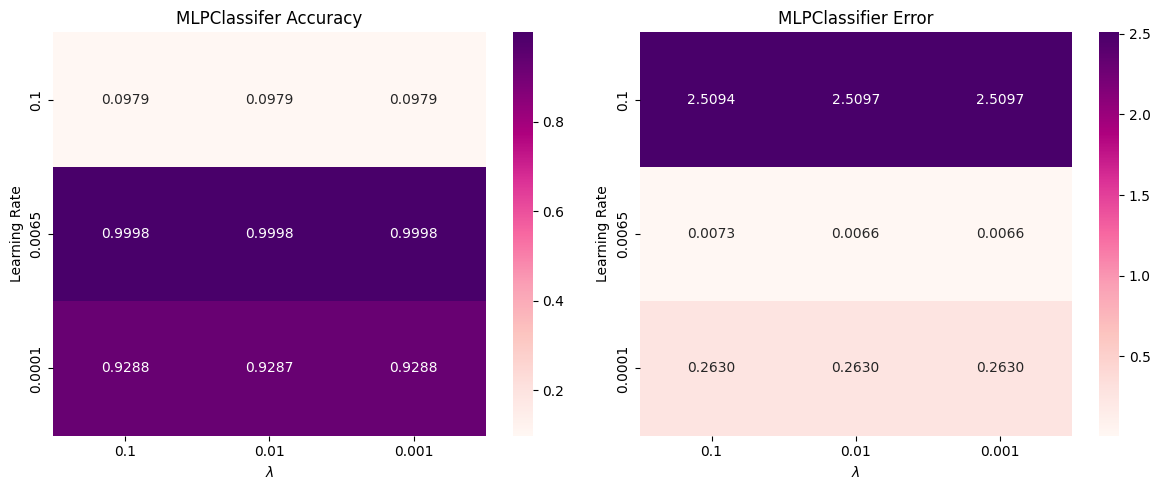

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(classifier_accuracy, annot=True, fmt=".4f", cmap="RdPu",
            xticklabels=lam_list, yticklabels=eta_list, ax=axes[0])
axes[0].set_title("MLPClassifer Accuracy")
axes[0].set_xlabel(r"$\lambda$")
axes[0].set_ylabel("Learning Rate")

sns.heatmap(classifier_error, annot=True, fmt=".4f", cmap="RdPu",
            xticklabels=lam_list, yticklabels=eta_list, ax=axes[1])
axes[1].set_title("MLPClassifier Error")
axes[1].set_xlabel(r"$\lambda$")
axes[1].set_ylabel("Learning Rate")

plt.tight_layout()
plt.show()